*2024/10/29*
***
# 线性神经网络
## 1 线性回归
### 1.1 线性模型

线性模型中，假设输入包含d个特征，预测结果$\hat{y}$表示为

$$\hat{y} = w_1  x_1 + ... + w_d  x_d + b$$

将所有特征放到向量$\mathbf{x} \in \mathbb{R}^d$中，将所有权重放到向量$\mathbf{w} \in \mathbb{R}^d$中，使用点积的形式表示模型：

$$\hat{y} = \mathbf{w}^\top \mathbf{x} + b$$

向量$\mathbf{x}$是单个数据样本的特征，使用矩阵$\mathbf{X} \in \mathbb{R}^{n \times d}$来表示数据集的$n$个样本。其中，$\mathbf{X}$的行代表样本，列代表特征。

因此，预测值$\hat{\mathbf{y}} \in \mathbb{R}^n$可以表示为：

$${\hat{\mathbf{y}}} = \mathbf{X} \mathbf{w} + b$$

训练的过程就是寻找一组权重向量$\mathbf{w}$和偏置$b$，使得预测值和真实值之间的误差尽可能小。

### 1.2 损失函数
损失函数（loss function）用来量化预测值和真实值之间的差距。一般选用非负数作为损失，且数值越小表示损失越小。回归中，最常用的损失函数是均方误差（mean squared error, MSE）：

$$l^{(i)}(\mathbf{w}, b) = \frac{1}{2}({\hat{y}}^{(i)} - y^{(i)})^2$$

$$L(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n}l^{(i)}(\mathbf{w}, b) = \frac{1}{n}\sum_{i=1}^{n}{\frac{1}{2}}(\mathbf{w}^{\top}\mathbf{x}^{(i)} + b - y^{(i)})^2$$

### 1.3 随机梯度下降

梯度下降（gradient descent）通过不断再损失函数递减的方向上更新参数来降低误差。因为要遍历整个数据集，执行可能很慢，因此通常在每次需要计算更新的适合随机抽取一小批样本，称之为小批量随机梯度下降（mini-batch stochastic gradient descent）。

$$(\mathbf{w},b) \leftarrow (\mathbf{w},b) - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{(\mathbf{w},b)} l^{(i)}(\mathbf{w},b)$$

对于平方损失和仿射变换，可以明确地写成如下形式:

$$\begin{aligned} \mathbf{w} &\leftarrow \mathbf{w} -   \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_{\mathbf{w}} l^{(i)}(\mathbf{w}, b) = \mathbf{w} - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \mathbf{x}^{(i)} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right),\\ b &\leftarrow b -  \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \partial_b l^{(i)}(\mathbf{w}, b)  = b - \frac{\eta}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} \left(\mathbf{w}^\top \mathbf{x}^{(i)} + b - y^{(i)}\right). \end{aligned}$$

$|B|$表示每个小批量中的样本数（batch size），$\eta$表示学习率（learning rate）。它们的值通常是预先手动指定，而不是训练得到的，称之为超参数（hyperparameter）。

泛化误差（generalization error）是模型在新样本上表现的好坏，而不是在训练集上的表现。为了降低泛化误差，我们通常会在训练集上训练模型，然后在测试集上评估模型的性能。

### 1.4 <font color=Red>正态分布与平方损失</font>

假设观测中包含的噪声服从正态分布：

$$y = \mathbf{w}^\top \mathbf{x} + b + \epsilon,$$

其中，$\epsilon \sim \mathcal{N}(0, \sigma^2)$。

因此，给定x观测到特定y的*似然*（likelihood）:

$$P(y|\mathbf{x}) = \frac{1}{\sqrt{2{\pi}{\sigma}^2}}exp(-\frac{1}{2{\sigma}^2}(y-\mathbf{w}^\top\mathbf{x}-b)^2)$$

根据*极大似然估计*（maximum likelihood estimation），参数$\mathbf{w}$和$b$的最优值是使整个数据集的似然最大的值：

$$P({\bf{\it{y}}}|{\bf{\it{X}}}) = \prod_{i=1}^{n}p(y^{(i)}|\mathbf{x}^{(i)})$$

根据极大似然估计法选择的估计量称为*极大似然估计量*。一般地，优化通常是说最小化而不是最大化。因此改为*最小化负对数似然*$-\log P(\mathbf y \mid \mathbf X)$。由此可以得到的数学公式是：

$$-\log P(\mathbf y \mid \mathbf X) = \sum_{i=1}^n \frac{1}{2} \log(2 \pi \sigma^2) + \frac{1}{2 \sigma^2} \left(y^{(i)} - \mathbf{w}^\top \mathbf{x}^{(i)} - b\right)^2$$

只需要假设$\sigma$是某个固定常数就可以忽略第一项，因为第一项不依赖于$\mathbf{w}$和$b$。现在第二项除了常数$\frac{1}{\sigma^2}$外，其余部分和前面介绍的均方误差是一样的。幸运的是，上面式子的解并不依赖于$\sigma$。因此，在高斯噪声的假设下，最小化均方误差等价于对线性模型的极大似然估计。

### 1.5 神经网络
将线性回归模型描述为一个神经网络，该图只显示连接模式，即只显示每个输入如何连接到输出，隐去了权重和偏置的值。

![线性回归是一个单层神经网络。](https://github.com/KeKeoor/DeepLearning_notes/tree/main/img/singleneuron.svg)

## 2 线性回归的实现


In [9]:
import random
import torch
from d2l import torch as d2l

### 2.1 生成数据集
生成一个包含1000个样本的数据集， 每个样本包含从标准正态分布中采样的2个特征，${\bf{\it{X}}}\in{\Bbb{R}}^{1000\times{2}}$。

使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$和偏置$b = 4.2$，和噪声项$\epsilon$来生成数据集及其标签：

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$$

代码如下：

In [10]:
def synthetic_data(w, b, num_examples):
    """
    生成y = Xw + b + 噪声
    :param w:
    :param b:
    :param num_examples:
    :return:
    """
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))    # y.shape = (num_examples, 1), -1表示自动计算

In [11]:
true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

In [12]:
print('features:', features[0], '\nlabel:', labels[0])

features: tensor([0.1896, 0.5122]) 
label: tensor([2.8291])


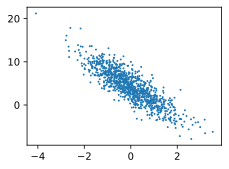

In [13]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1)

### 2.2 读取数据集
在训练模型时，需要遍历数据集并不断读取小批量数据样本。

定义一个函数（data_iter），它接收批量大小（batch_size）、特征矩阵（features）、标签向量（labels），返回大小为batch_size的batch，每个batch包含一组特征和标签。


In [14]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(indices[i:min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

在这里yield关键字的作用是将函数变成一个生成器，可以使用for循环来遍历所有的数据。

通常，利用GPU并行计算的优势，设置合适大小的batch_size，每个样本可以并行计算。

然而上述的for循环效率太低，在深度学习框架中，通常使用更高效的数据迭代方式。

### 2.3 初始化模型参数
在训练开始之前，需要初始化权重。下面从均值为0，标准差为0.01的正态分布中随机初始化权重，偏置初始化为0。

In [15]:
w = torch.normal(0, 0.01, size=(2, 1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)

### 2.4 定义模型
这里是线性模型

In [16]:
def linreg(X, w, b):
    return torch.matmul(X, w) + b

### 2.5 定义损失函数
使用均方误差损失函数（MSE）

In [17]:
def squared_loss(y_hat, y):
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

### 2.6 定义优化算法
使用小批量随机梯度下降算法来优化模型的损失函数。

在每一步中，使用从数据集中随机抽取的一个小批量，然后根据参数计算损失的梯度。接下来，朝着减少损失的方向更新我们的参数。下面的函数实现小批量随机梯度下降更新。该函数接受模型参数集合、学习速率和批量大小作为输入。每一步更新的大小由学习速率lr决定。因为我们计算的损失是一个批量样本的总和，所以我们用批量大小（batch_size）来规范化步长，这样步长大小就不会取决于我们对批量大小的选择。

In [18]:
def sgd(params, lr, batch_size):
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

### 2.7 训练
在每次迭代中，我们读取一小批量训练样本，并通过我们的模型来获得一组预测。计算完损失后，我们开始反向传播，存储每个参数的梯度。最后，我们调用优化算法sgd来更新模型参数。

1. 初始化模型参数
2. 重复以下训练，直到完成
    - 计算梯度$\mathbf{g} \leftarrow \partial_{(\mathbf{w},b)} \frac{1}{|\mathcal{B}|} \sum_{i \in \mathcal{B}} l(\mathbf{x}^{(i)}, y^{(i)}, \mathbf{w}, b)$
    - 更新参数$(\mathbf{w}, b) \leftarrow (\mathbf{w}, b) - \eta \mathbf{g}$

在每个迭代周期（epoch）中，我们使用data_iter函数遍历整个数据集，并将训练数据集中所有样本都使用一次（假设样本数能够被批量大小整除）。这里的迭代周期个数num_epochs和学习率lr都是超参数，分别设为3和0.03。

In [19]:
lr = 0.03
num_epochs = 3
net = linreg
loss = squared_loss

In [20]:
for epoch in range(num_epochs):
    for X, y in data_iter(10, features, labels):
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, 10)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

epoch 1, loss 0.033777
epoch 2, loss 0.000123
epoch 3, loss 0.000051
